# Analysis of USD/EGP Exchange Rates and Historical Events

### **Data Preparation**

### Questions to Answer

we  started by formulating the questions that we wanted to answer through our analysis. These questions are listed below.

1. How did the distribution of USD/EGP exchange rates change around the time of the Egyptian Revolution of 2011?
2. How did the Egyptian Revolution of 2011 impact the price trend?
3. Was there a shift in the average USD/EGP exchange rate around the time of Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)?
4. How did the Implementation  of Post Floating Exchange Rate  impact the price trend?
5. Was there a shift in the average USD/EGP exchange rate around the time of Economic Policy Changes (2016-2021)?
6. How did the Economic Policy Changes (2016-2021) impact the price trend?
7. How did the distribution of global exchange rates change during the COVID-19 pandemic compared to before and after?
8. How did the Global Pandemic COVID (2020-2022) impact the price trend?






###**Data Requirements Specification**

We then specified the requirements for the data set We would analyze to answer our questions. These requirements are listed below.

*The data set must:*

- contain data for daily historical price of USD-EGY pound exhange rate
- contain the prices from (1990 ,2024)
- be relatively clean and easy to work with
- be free and publicly accessible
- be in a standard format (such as a CSV file)

### **Understanding the Data Set**

we then examined the data set to understand its contents.

In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind
from google.colab import files

# Upload the data file
upload = files.upload()

# Read the data
df = pd.read_csv('USD_EGP Historical Data1.csv')
df.head(5)


Saving USD_EGP Historical Data1.csv to USD_EGP Historical Data1.csv


,Date,Price,Open,High,Low,Change %
0,5/23/2024,47.1495,46.7885,47.30,46.6879,0.88%
1,5/22/2024,46.7400,46.6500,46.89,46.5500,0.13%
2,5/21/2024,46.6800,46.6400,46.75,46.5200,0.19%
3,5/20/2024,46.5900,46.8500,46.95,46.5400,-0.45%
4,5/19/2024,46.8000,46.9000,47.02,46.7400,-0.13%


In [4]:
print("Number of rows: ", df.shape[0], "\nNumber of columns: ", df.shape[1])
print("Contains missing values:", df.isnull().values.any())

Number of rows:  9871 
Number of columns:  6
Contains missing values: False


In [5]:
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)

             Price         Open         High          Low
count  9871.000000  9871.000000  9871.000000  9871.000000
mean      7.944455     7.943048     7.968405     7.927616
std       6.309181     6.304307     6.340187     6.282712
min       2.689200     2.689200     2.689200     2.689200
25%       3.786850     3.780000     3.840650     3.758800
50%       5.763500     5.765000     5.770000     5.766800
75%       7.630000     7.630000     7.630000     7.625000
max      49.500000    49.600000    50.800000    49.400000
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object


In [6]:
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9871 non-null   object 
 1   Price     9871 non-null   float64
 2   Open      9871 non-null   float64
 3   High      9871 non-null   float64
 4   Low       9871 non-null   float64
 5   Change %  9871 non-null   object 
dtypes: float64(4), object(2)
memory usage: 462.8+ KB
None


The dataset contains historical data for USD/EGP exchange rates along with related attributes. It comprises 9871 rows representing various dates and 6 columns representing different attributes. The columns represent date, price, opening price, high, low, and percentage change.



---



In [7]:
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Sort the data by date
df = df.sort_index()


In [49]:

# Define the events with their start and end dates
events = {
    "Egyptian Revolution (2011)": ["2011-01-01", "2011-02-28"],
    "CBE Floating EGP (2016-2017)": ["2016-11-01", "2017-12-31"],
    "Economic Policy Changes (2016-2021)": ["2016-01-01", "2021-12-31"],
    "Global Pandemic COVID (2020-2022)": ["2020-03-19", "2022-06-17"]
}


# Full time series



------------------



Saving USD_EGP Historical Data1.csv to USD_EGP Historical Data1 (4).csv


<ipython-input-52-ea728d887c46>:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


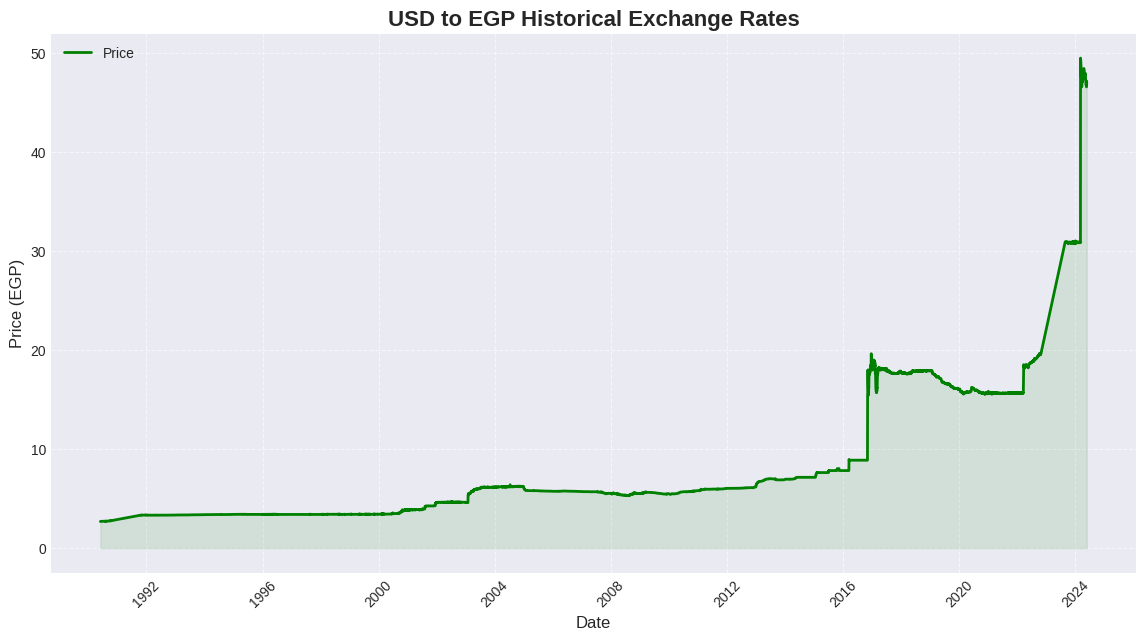

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the uploaded CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by datea
df = df.sort_values('Date')

# Plot the time series with enhancements
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Price', color='green', linewidth=2)
plt.fill_between(df['Date'], df['Price'], color='green', alpha=0.1)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (EGP)', fontsize=12)
plt.title('USD to EGP Historical Exchange Rates', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the ticks
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a background style
plt.style.use('seaborn-darkgrid')

plt.show()



## Analysis of Egyptian Revolution (2011)

In this analysis, we aim to investigate the impact of Egyptian Revolution (2011) on the Egyptian Pound (EGP) exchange rate against the US Dollar (USD). We will compare the exchange rates for two years before and two years after the specified event.




### **Question 1: How did the distribution of USD/EGP exchange rates change around the time of the Egyptian Revolution of 2011?**

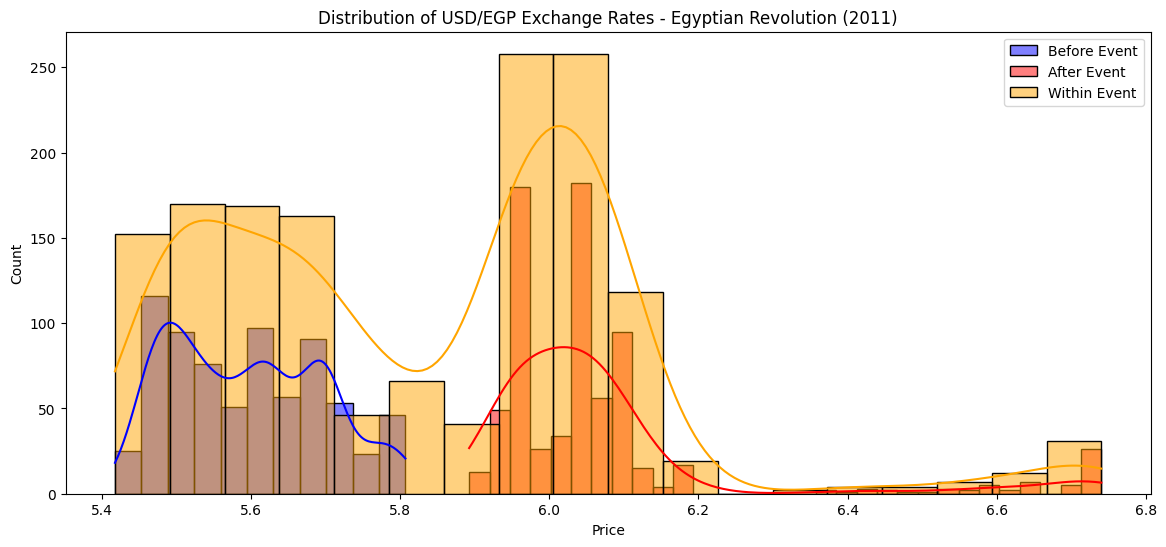

In [9]:

# Analysis for Egyptian Revolution (2011)
event_name = "Egyptian Revolution (2011)"
start_date = "2011-01-01"
end_date = "2011-02-28"

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Calculate standard deviation before and after the event
std_before = before_event['Price'].std()
std_after = after_event['Price'].std()

# Plot distribution before and after the event
plt.figure(figsize=(14, 6))
sns.histplot(before_event['Price'], kde=True, color='blue', label='Before Event')
sns.histplot(after_event['Price'], kde=True, color='red', label='After Event')
sns.histplot(event_data['Price'], kde=True, color='orange', label='Within Event')
plt.title(f'Distribution of USD/EGP Exchange Rates - Egyptian Revolution (2011)')
plt.legend()
plt.show()



### Distribution of USD/EGP Exchange Rates - Egyptian Revolution (2011)

The above graph shows the distribution of USD/EUR exchange rates before, during, and after the Egyptian Revolution of (2011). The blue histogram represents the distribution before the event, while the red histogram represents the distribution after the event.

  **observation:**

*  The USD/EUR exchange rates exhibit right skewness before, during, and after

*  the Egyptian Revolution of 2011, indicating more data points with lower exchange rates and a longer tail towards higher rates

*  Exchange rate distribution during the revolution is wider, suggesting increased volatility compared to periods before or after the event.

*  It's challenging to determine the average direction of exchange rate change during the revolution from this graph due to overlapping distributions.


### **Qestion 2: How did the Egyptian Revolution of 2011 impact the price trend?**

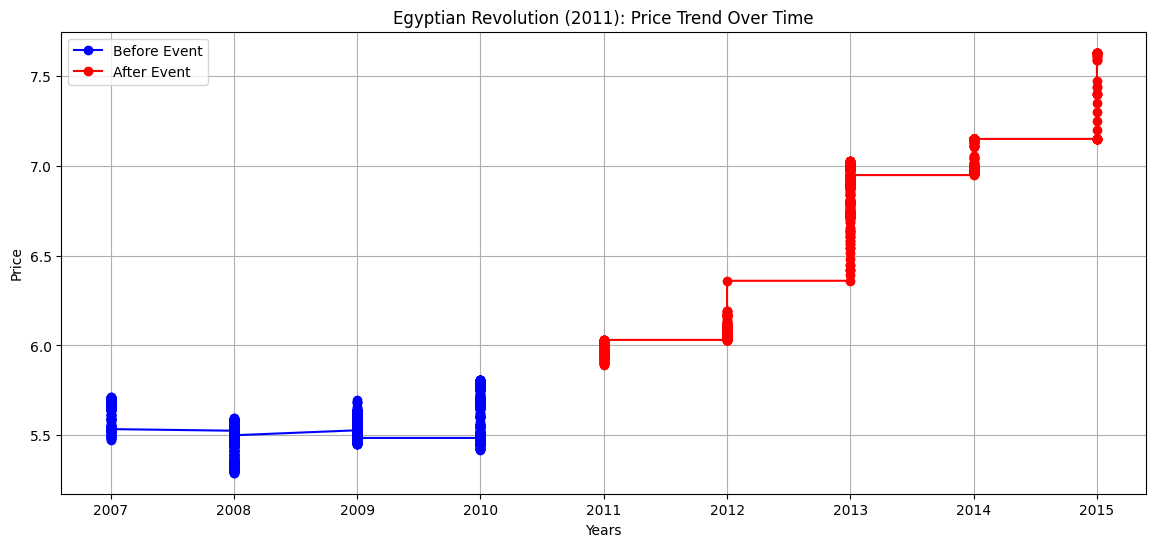

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

event_name = "Egyptian Revolution (2011)"
start_date = "2011-01-01"
end_date = "2011-02-28"
df.index = pd.to_datetime(df.index)

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= (period_before_start - pd.DateOffset(years=2))) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= (period_after_end + pd.DateOffset(years=2)))]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Plotting the data
plt.figure(figsize=(14, 6))

plt.plot(before_event.index.year, before_event['Price'], label='Before Event', color='blue', marker='o')
plt.plot(after_event.index.year, after_event['Price'], label='After Event', color='red', marker='o')


plt.title('Egyptian Revolution (2011): Price Trend Over Time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()


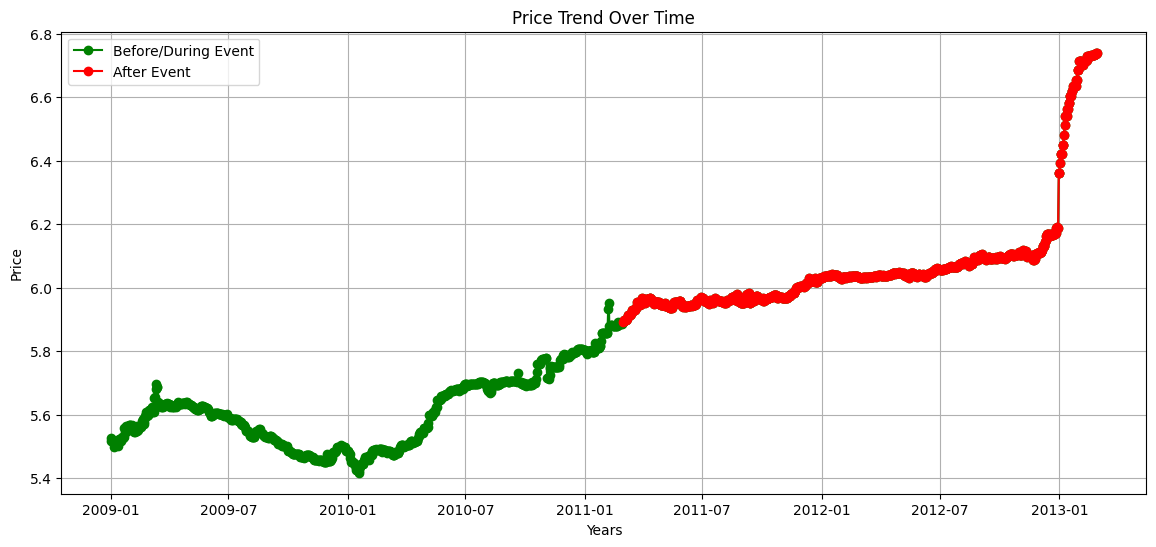

In [11]:
    # Analysis for Egyptian Revolution (2011)
    event_name = "Egyptian Revolution (2011)"
    start_date = "2011-01-01"
    end_date = "2011-02-28"


    df.index = pd.to_datetime(df.index)

    period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
    period_before_end = pd.to_datetime(start_date)
    period_after_start = pd.to_datetime(end_date)
    period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

    before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
    after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
    event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

    plt.figure(figsize=(14, 6))


    plt.plot(event_data.index, event_data['Price'], label='Before/During Event', color='green', marker='o')
    plt.plot(after_event.index, after_event['Price'], label='After Event', color='red', marker='o')

    plt.title('Price Trend Over Time')
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend()

    plt.grid(True)
    plt.show()



# Calculate mean before and after event

In [12]:

# Calculate mean before and after the event
mean_before = before_event['Price'].mean()
mean_after = after_event['Price'].mean()

t_stat, p_value = ttest_ind(before_event['Price'], after_event['Price'], equal_var=False)
# Print results
print(f'Event: Egyptian Revolution (2011)')
print(f'Standard Deviation before event: {std_before}')
print(f'Standard Deviation after event: {std_after}')
print(f'Mean before event: {mean_before}')
print(f'Mean after event: {mean_after}')
print(f't-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
     print('Reject the null hypothesis: The event has a nigative significant impact on the EGP.')
else:
     print('Fail to reject the null hypothesis: The event does not have a nigative significant impact on the EGP.')
print('-' * 50)


Event: Egyptian Revolution (2011)
Standard Deviation before event: 0.1006410440443682
Standard Deviation after event: 0.18150027049179596
Mean before event: 5.594684520547945
Mean after event: 6.071613953488372
t-statistic: -62.12273353782879, p-value: 0.0
Reject the null hypothesis: The event has a nigative significant impact on the EGP.
--------------------------------------------------



### Conclusion - Egyptian Revolution (2011)

**Statistical Analysis:**
- **Standard Deviation before event:** {std_before}
- **Standard Deviation after event:** {std_after}
- **Mean before event:** {mean_before}
- **Mean after event:** {mean_after}

The statistical measures provide insight into the changes in the exchange rate's volatility and central tendency due to Egyptian Revolution (2011). Significant differences in these measures may indicate the event's impact on the exchange rate.




--------------




## Analysis of Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)

In this analysis, we aim to investigate the impact of Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017) on the Egyptian Pound (EGP) exchange rate against the US Dollar (USD). We will compare the exchange rates for two years before and two years after the specified event.




### **Question 3:Was there a shift in the average USD/EGP exchange rate around the time of Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)?**

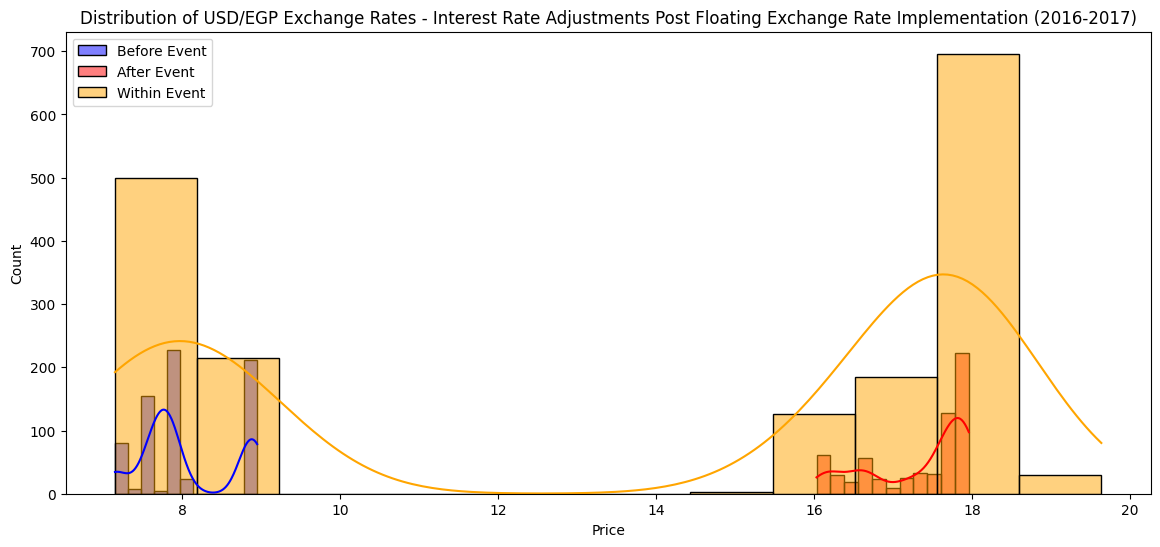

In [13]:

# Analysis for Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)
event_name = "Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)"
start_date = "2016-11-01"
end_date = "2017-12-31"

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Calculate standard deviation before and after the event
std_before = before_event['Price'].std()
std_after = after_event['Price'].std()

# Plot distribution before and after the event
plt.figure(figsize=(14, 6))
sns.histplot(before_event['Price'], kde=True, color='blue', label='Before Event')
sns.histplot(after_event['Price'], kde=True, color='red', label='After Event')
sns.histplot(event_data['Price'], kde=True, color='orange', label='Within Event')
plt.title(f'Distribution of USD/EGP Exchange Rates - Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)')
plt.legend()
plt.show()


### **Question 4:How did the Implementation  of Post Floating Exchange Rate  impact the price trend?**

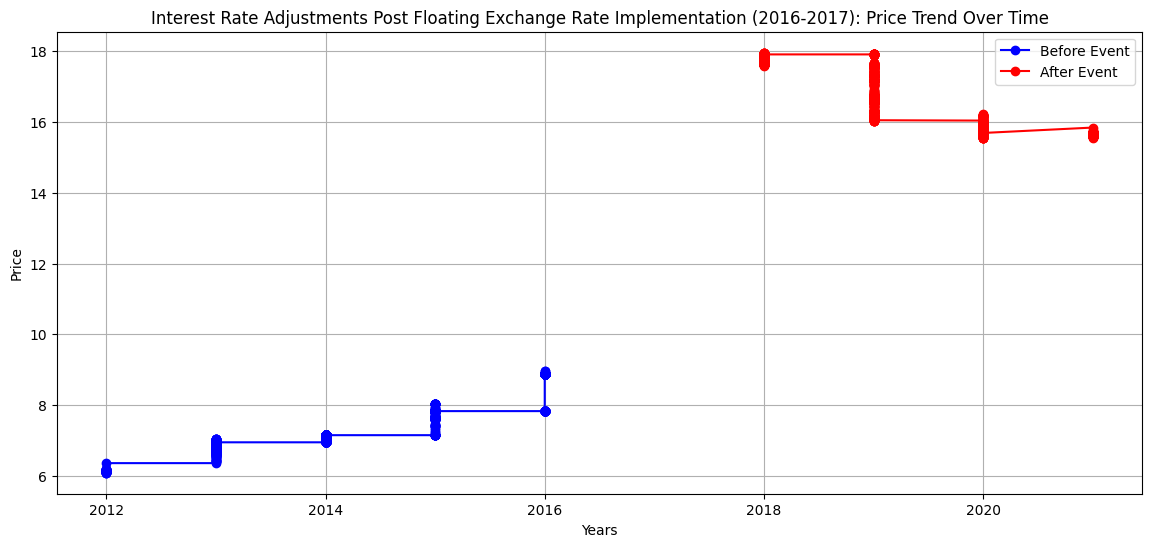

In [14]:
# Analysis for Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)
event_name = "Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)"
start_date = "2016-11-01"
end_date = "2017-12-31"
df.index = pd.to_datetime(df.index)

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= (period_before_start - pd.DateOffset(years=2))) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= (period_after_end + pd.DateOffset(years=2)))]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Plotting the data
plt.figure(figsize=(14, 6))

plt.plot(before_event.index.year, before_event['Price'], label='Before Event', color='blue', marker='o')
plt.plot(after_event.index.year, after_event['Price'], label='After Event', color='red', marker='o')


plt.title('Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017): Price Trend Over Time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()


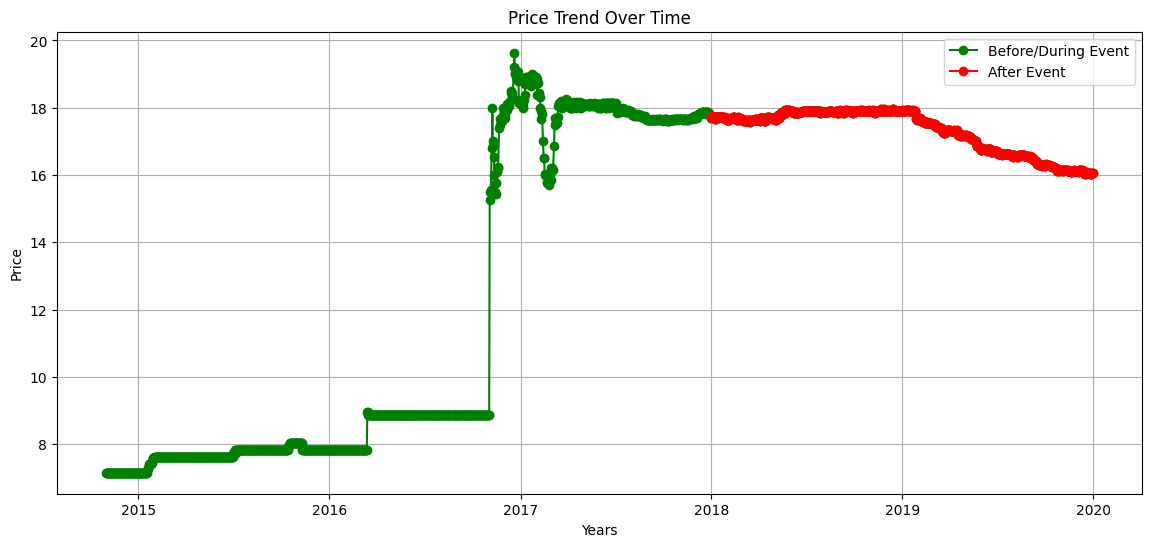

In [15]:
    event_name = "Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)"
    start_date = "2016-11-01"
    end_date = "2017-12-31"
    df.index = pd.to_datetime(df.index)

    period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
    period_before_end = pd.to_datetime(start_date)
    period_after_start = pd.to_datetime(end_date)
    period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

    before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
    after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
    event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

    plt.figure(figsize=(14, 6))


    plt.plot(event_data.index, event_data['Price'], label='Before/During Event', color='green', marker='o')
    plt.plot(after_event.index, after_event['Price'], label='After Event', color='red', marker='o')

    plt.title('Price Trend Over Time')
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend()

    plt.grid(True)
    plt.show()


### Distribution of USD/EGP Exchange Rates - Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)

The above graph shows the distribution of the USD/EGP exchange rates for the periods before and after Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017). The blue histogram represents the distribution before the event, while the red histogram represents the distribution after the event.

**Analysis:**
- The shape and spread of the distributions indicate the volatility and central tendency of the exchange rates during these periods.



### Seasonality and Trend Analysis - Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)

The above graphs display the original time series data, the trend component, the seasonal component, and the residuals for the USD/EGP exchange rates during the period encompassing Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017).

**Analysis:**
- The trend component shows the long-term movement of the exchange rate.
- The seasonal component reveals any periodic fluctuations within the data.
- The residuals indicate the noise or irregular component after removing the trend and seasonal effects.


In [16]:

# Calculate mean before and after the event
mean_before = before_event['Price'].mean()
mean_after = after_event['Price'].mean()

t_stat, p_value = ttest_ind(before_event['Price'], after_event['Price'], equal_var=False)
# Print results
print(f'Event: Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)')
print(f'Standard Deviation before event: {std_before}')
print(f'Standard Deviation after event: {std_after}')
print(f'Mean before event: {mean_before}')
print(f'Mean after event: {mean_after}')
print(f't-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
     print('Reject the null hypothesis: The event has a nigative significant impact on the EGP.')
else:
     print('Fail to reject the null hypothesis: The event does not have a nigative significant impact on the EGP.')
print('-' * 50)


Event: Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)
Standard Deviation before event: 0.5969053098610154
Standard Deviation after event: 0.6420127607602731
Mean before event: 8.024340084388184
Mean after event: 17.322917840375585
t-statistic: -274.6591387334357, p-value: 0.0
Reject the null hypothesis: The event has a nigative significant impact on the EGP.
--------------------------------------------------



### Conclusion - Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017)

**Statistical Analysis:**
- **Standard Deviation before event:** {std_before}
- **Standard Deviation after event:** {std_after}
- **Mean before event:** {mean_before}
- **Mean after event:** {mean_after}

The statistical measures provide insight into the changes in the exchange rate's volatility and central tendency due to Interest Rate Adjustments Post Floating Exchange Rate Implementation (2016-2017). Significant differences in these measures may indicate the event's impact on the exchange rate.




-------------




## Analysis of Economic Policy Changes (2016-2021)

In this analysis, we aim to investigate the impact of Economic Policy Changes (2016-2021) on the Egyptian Pound (EGP) exchange rate against the US Dollar (USD). We will compare the exchange rates for two years before and two years after the specified event.



### **Question 5:Was there a shift in the average USD/EGP exchange rate around the time of Economic Policy Changes (2016-2021)?**

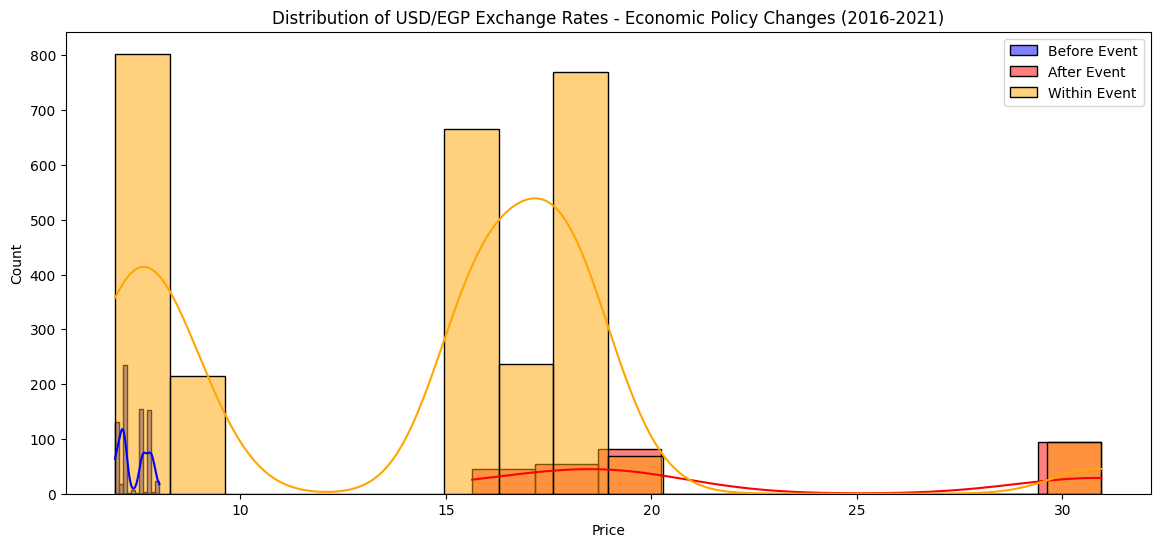

In [17]:

# Analysis for Economic Policy Changes (2016-2021)
event_name = "Economic Policy Changes (2016-2021)"
start_date = "2016-01-01"
end_date = "2021-12-31"

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Calculate standard deviation before and after the event
std_before = before_event['Price'].std()
std_after = after_event['Price'].std()

# Plot distribution before and after the event
plt.figure(figsize=(14, 6))
sns.histplot(before_event['Price'], kde=True, color='blue', label='Before Event')
sns.histplot(after_event['Price'], kde=True, color='red', label='After Event')
sns.histplot(event_data['Price'], kde=True, color='orange', label='Within Event')
plt.title(f'Distribution of USD/EGP Exchange Rates - Economic Policy Changes (2016-2021)')
plt.legend()
plt.show()



### Distribution of USD/EGP Exchange Rates - Economic Policy Changes (2016-2021)

The above graph shows the distribution of the USD/EGP exchange rates for the periods before and after Economic Policy Changes (2016-2021). The blue histogram represents the distribution before the event, while the red histogram represents the distribution after the event.

**Analysis:**
- The shape and spread of the distributions indicate the volatility and central tendency of the exchange rates during these periods.


### **Question 6: How did the Economic Policy Changes (2016-2021) impact the price trend?**

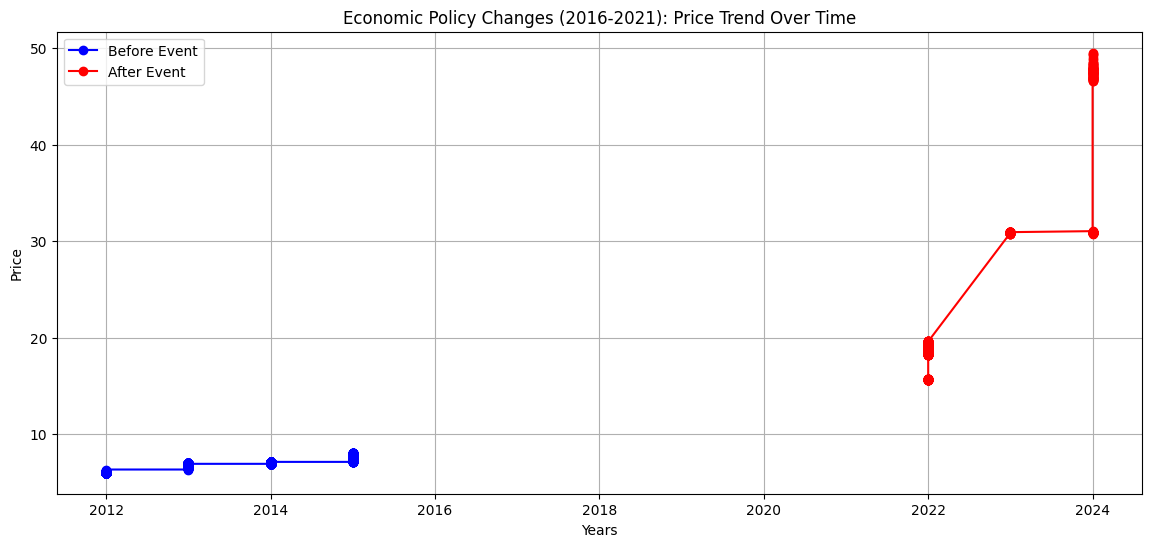

In [18]:
# Analysis for Economic Policy Changes (2016-2021)
event_name = "Economic Policy Changes (2016-2021)"
start_date = "2016-01-01"
end_date = "2021-12-31"
df.index = pd.to_datetime(df.index)

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= (period_before_start - pd.DateOffset(years=2))) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= (period_after_end + pd.DateOffset(years=2)))]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Plotting the data
plt.figure(figsize=(14, 6))

plt.plot(before_event.index.year, before_event['Price'], label='Before Event', color='blue', marker='o')
plt.plot(after_event.index.year, after_event['Price'], label='After Event', color='red', marker='o')


plt.title('Economic Policy Changes (2016-2021): Price Trend Over Time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()

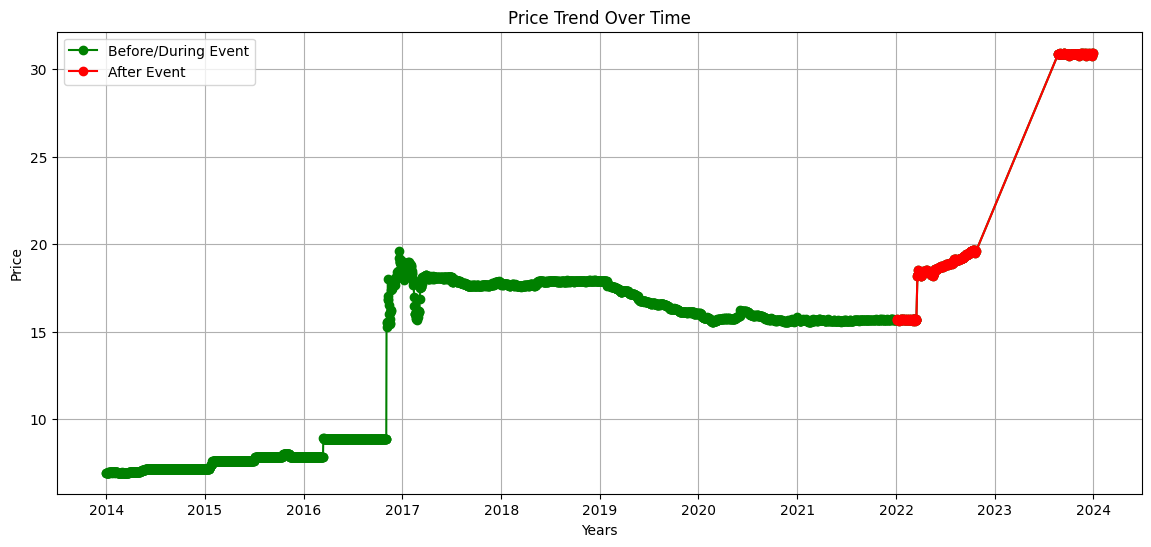

In [19]:
    event_name = "Economic Policy Changes (2016-2021)"
    start_date = "2016-01-01"
    end_date = "2021-12-31"
    df.index = pd.to_datetime(df.index)
    period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
    period_before_end = pd.to_datetime(start_date)
    period_after_start = pd.to_datetime(end_date)
    period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

    before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
    after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
    event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

    plt.figure(figsize=(14, 6))


    plt.plot(event_data.index, event_data['Price'], label='Before/During Event', color='green', marker='o')
    plt.plot(after_event.index, after_event['Price'], label='After Event', color='red', marker='o')

    plt.title('Price Trend Over Time')
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend()

    plt.grid(True)
    plt.show()

In [20]:

# Calculate mean before and after the event
mean_before = before_event['Price'].mean()
mean_after = after_event['Price'].mean()

t_stat, p_value = ttest_ind(before_event['Price'], after_event['Price'], equal_var=False)
# Print results
print(f'Event: Economic Policy Changes (2016-2021)')
print(f'Standard Deviation before event: {std_before}')
print(f'Standard Deviation after event: {std_after}')
print(f'Mean before event: {mean_before}')
print(f'Mean after event: {mean_after}')
print(f't-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
     print('Reject the null hypothesis: The event has a nigative significant impact on the EGP.')
else:
     print('Fail to reject the null hypothesis: The event does not have a nigative significant impact on the EGP.')
print('-' * 50)


Event: Economic Policy Changes (2016-2021)
Standard Deviation before event: 0.34552127494156926
Standard Deviation after event: 6.197052601980622
Mean before event: 7.398233150684932
Mean after event: 22.463964620938626
t-statistic: -40.43793106655457, p-value: 3.855425234494932e-118
Reject the null hypothesis: The event has a nigative significant impact on the EGP.
--------------------------------------------------



### Conclusion - Economic Policy Changes (2016-2021)

**Statistical Analysis:**
- **Standard Deviation before event:** {std_before}
- **Standard Deviation after event:** {std_after}
- **Mean before event:** {mean_before}
- **Mean after event:** {mean_after}

The statistical measures provide insight into the changes in the exchange rate's volatility and central tendency due to Economic Policy Changes (2016-2021). Significant differences in these measures may indicate the event's impact on the exchange rate.




---




## Analysis of Global Pandemic (2020-2022)

In this analysis, we aim to investigate the impact of Global Pandemic (2020-2022) on the Egyptian Pound (EGP) exchange rate against the US Dollar (USD). We will compare the exchange rates for two years before and two years after the specified event.




### **Question 7: How did the distribution of global exchange rates change during the COVID-19 pandemic compared to before and after?**

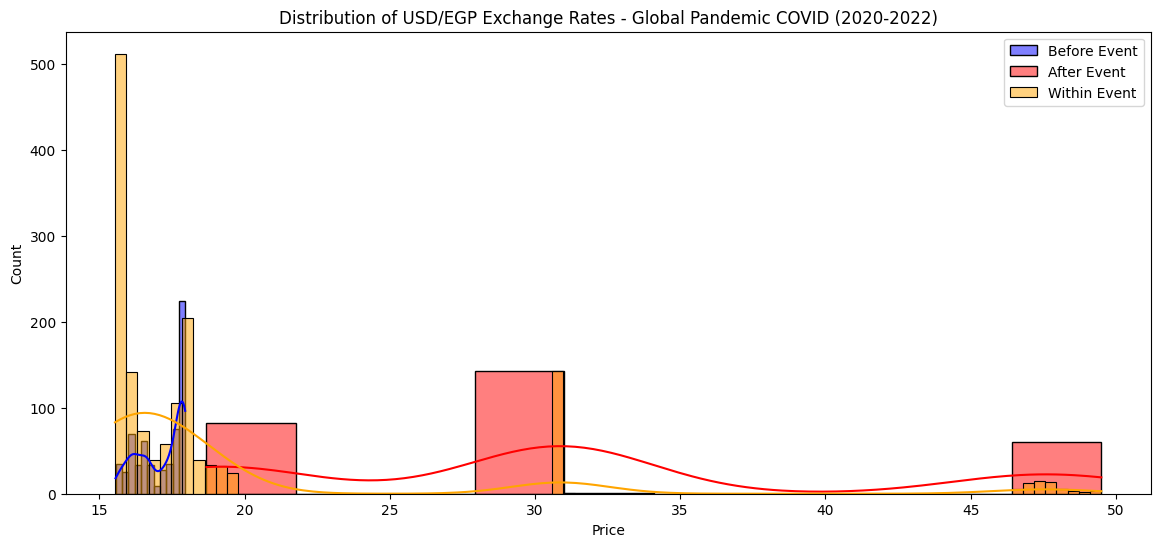

In [21]:

# Analysis for Global Pandemic (2020-2022)
event_name = "Global Pandemic COVID (2020-2022)"
start_date = "2020-03-19"
end_date = "2022-06-17"

# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Calculate standard deviation before and after the event
std_before = before_event['Price'].std()
std_after = after_event['Price'].std()

# Plot distribution before and after the event
plt.figure(figsize=(14, 6))
sns.histplot(before_event['Price'], kde=True, color='blue', label='Before Event')
sns.histplot(after_event['Price'], kde=True, color='red', label='After Event')
sns.histplot(event_data['Price'], kde=True, color='orange', label='Within Event')
plt.title(f'Distribution of USD/EGP Exchange Rates - Global Pandemic COVID (2020-2022)')
plt.legend()
plt.show()



### Distribution of USD/EGP Exchange Rates - Global Pandemic (2020-2022)

The above graph shows the distribution of the USD/EGP exchange rates for the periods before and after Global Pandemic (2020-2022). The blue histogram represents the distribution before the event, while the red histogram represents the distribution after the event.

**Analysis:**
- The shape and spread of the distributions indicate the volatility and central tendency of the exchange rates during these periods.


### **Question 8: How did the Global Pandemic COVID (2020-2022) impact the price trend?**

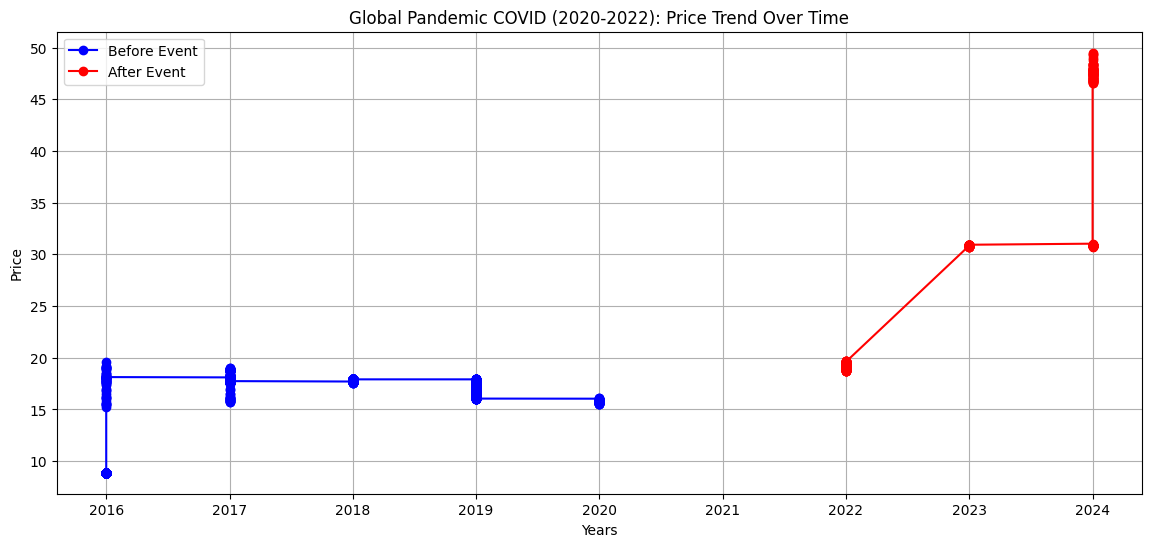

In [22]:
event_name = "Global Pandemic COVID (2020-2022)"
start_date = "2020-03-19"
end_date = "2022-06-17"
# Define periods before and after the event
period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
period_before_end = pd.to_datetime(start_date)
period_after_start = pd.to_datetime(end_date)
period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

# Extract data for the periods
before_event = df[(df.index >= (period_before_start - pd.DateOffset(years=2))) & (df.index < period_before_end)]
after_event = df[(df.index > period_after_start) & (df.index <= (period_after_end + pd.DateOffset(years=2)))]
event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

# Plotting the data
plt.figure(figsize=(14, 6))

plt.plot(before_event.index.year, before_event['Price'], label='Before Event', color='blue', marker='o')
plt.plot(after_event.index.year, after_event['Price'], label='After Event', color='red', marker='o')


plt.title('Global Pandemic COVID (2020-2022): Price Trend Over Time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()

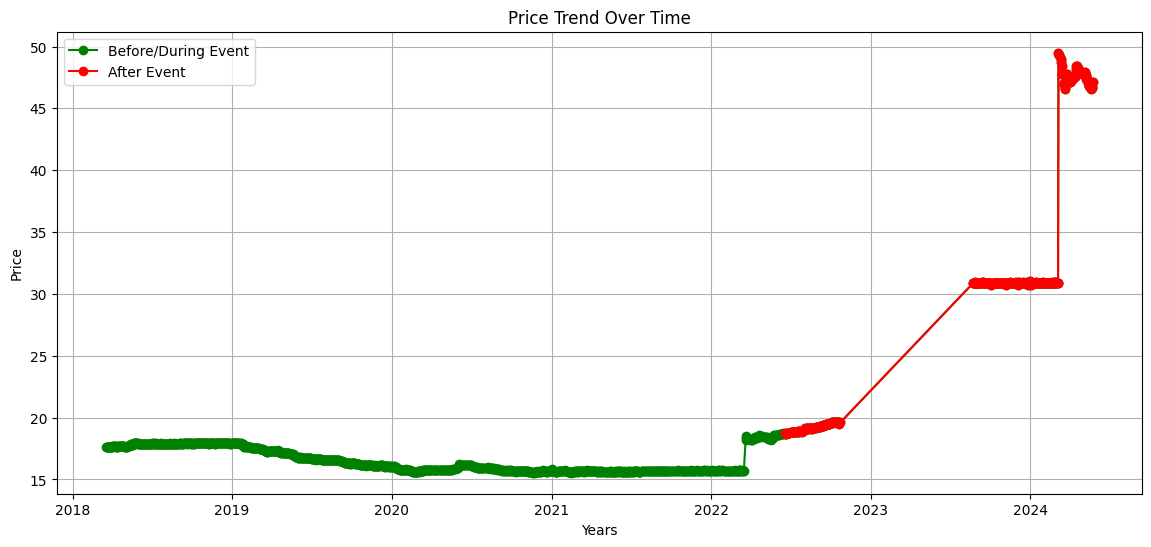

In [23]:
    event_name = "Global Pandemic COVID (2020-2022)"
    start_date = "2020-03-19"
    end_date = "2022-06-17"

    df.index = pd.to_datetime(df.index)
    period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
    period_before_end = pd.to_datetime(start_date)
    period_after_start = pd.to_datetime(end_date)
    period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

    before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
    after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]
    event_data = df[(df.index >= period_before_start) & (df.index <= period_after_end)]

    plt.figure(figsize=(14, 6))


    plt.plot(event_data.index, event_data['Price'], label='Before/During Event', color='green', marker='o')
    plt.plot(after_event.index, after_event['Price'], label='After Event', color='red', marker='o')

    plt.title('Price Trend Over Time')
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.legend()

    plt.grid(True)
    plt.show()



### Seasonality and Trend Analysis - Global Pandemic (2020-2022)

The above graphs display the original time series data, the trend component, the seasonal component, and the residuals for the USD/EGP exchange rates during the period encompassing Global Pandemic (2020-2022).

**Analysis:**
- The trend component shows the long-term movement of the exchange rate.
- The seasonal component reveals any periodic fluctuations within the data.
- The residuals indicate the noise or irregular component after removing the trend and seasonal effects.


In [45]:

# Calculate mean before and after the event
mean_before = before_event['Price'].mean()
mean_after = after_event['Price'].mean()

t_stat, p_value = ttest_ind(before_event['Price'], after_event['Price'], equal_var=False)
# Print results
print(f'Event: Global Pandemic (2020-2022)')
print(f'Standard Deviation before event: {std_before}')
print(f'Standard Deviation after event: {std_after}')
print(f'Mean before event: {mean_before}')
print(f'Mean after event: {mean_after}')
print(f't-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
     print('Reject the null hypothesis: The event has a nigative significant impact on the EGP.')
else:
     print('Fail to reject the null hypothesis: The event does not have a nigative significant impact on the EGP.')
print('-' * 50)


Event: Global Pandemic (2020-2022)
Standard Deviation before event: 0.7872822757993758
Standard Deviation after event: 9.917476034355031
Mean before event: 17.11462575516693
Mean after event: 31.031063636363637
t-statistic: -23.69674168432421, p-value: 1.7263154429880524e-69
Reject the null hypothesis: The event has a nigative significant impact on the EGP.
--------------------------------------------------



### Conclusion - Global Pandemic (2020-2022)

**Statistical Analysis:**
- **Standard Deviation before event:** {std_before}
- **Standard Deviation after event:** {std_after}
- **Mean before event:** {mean_before}
- **Mean after event:** {mean_after}

The statistical measures provide insight into the changes in the exchange rate's volatility and central tendency due to Global Pandemic (2020-2022). Significant differences in these measures may indicate the event's impact on the exchange rate.



# Analysis of the Mean USD/EGP Exchange Rates Before and After Significant Events

In [50]:
events_list = []
mean_before_list = []
mean_after_list = []

# Calculate statistics and perform analysis
for event, (start_date, end_date) in events.items():
    # Define the periods before and after the event
    period_before_start = pd.to_datetime(start_date) - pd.DateOffset(years=2)
    period_before_end = pd.to_datetime(start_date)
    period_after_start = pd.to_datetime(end_date)
    period_after_end = pd.to_datetime(end_date) + pd.DateOffset(years=2)

    # Extract data for the periods
    before_event = df[(df.index >= period_before_start) & (df.index < period_before_end)]
    after_event = df[(df.index > period_after_start) & (df.index <= period_after_end)]

    # Calculate mean
    mean_before = before_event['Price'].mean()
    mean_after = after_event['Price'].mean()

    # Append the results to the lists
    events_list.append(event)
    mean_before_list.append(mean_before)
    mean_after_list.append(mean_after)

# Create a DataFrame for plotting
mean_data = pd.DataFrame({
    'Event': events_list,
    'Mean Before': mean_before_list,
    'Mean After': mean_after_list
})


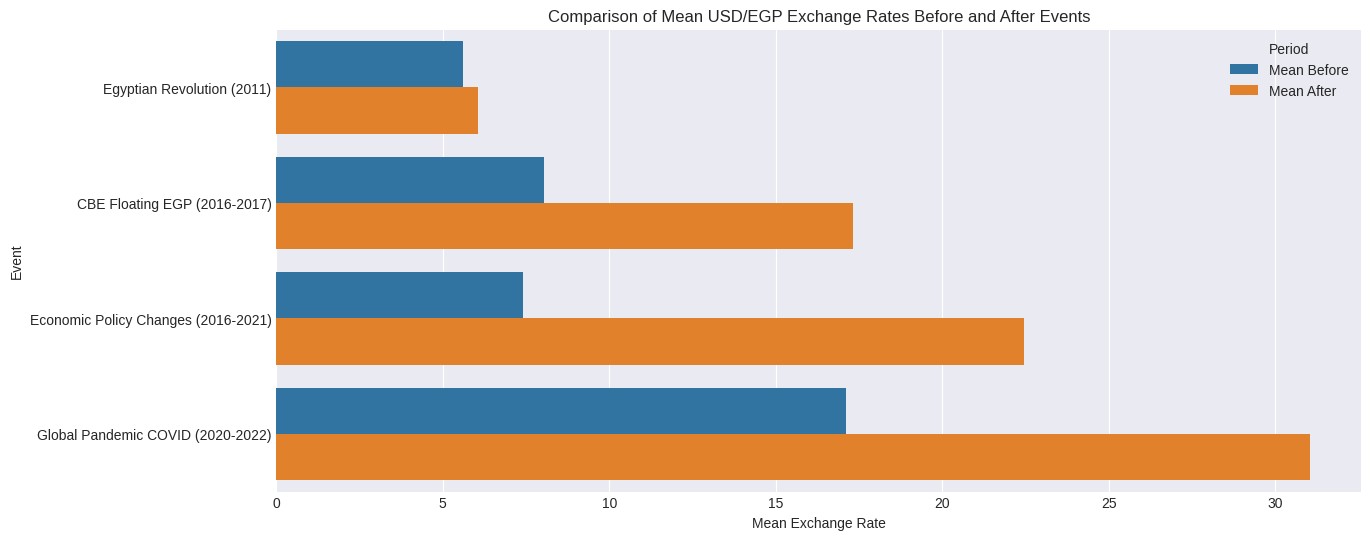

In [51]:
plt.figure(figsize=(14, 6))
mean_data_melted = pd.melt(mean_data, id_vars='Event', var_name='Period', value_name='Mean Exchange Rate')
sns.barplot(y='Event', x='Mean Exchange Rate', hue='Period', data=mean_data_melted)
plt.title('Comparison of Mean USD/EGP Exchange Rates Before and After Events')
plt.xlabel('Mean Exchange Rate')
plt.ylabel('Event')
plt.show()


# Hypothesis Testing Conclusion
# H0: The historical events have no significant negative impact on the Egyptian pound.
# H1: The historical events have a significant negative impact on the Egyptian pound.

# The analysis concludes by comparing the mean and standard deviation before and after the events to determine the significance of the impact.
